## **IMPORT LIBRARY/PACKAGES**

Import the requisite libraries/packages to facilitate data analytics, preprocessing, visualization, and machine learning modeling.

In [1]:
import os
import shutil
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## **DATA PREPARATION**

Download the latest version of the diabetes prediction dataset from Kaggle via Kagglehub. Once downloaded, the dataset will be located within the specific file path.

In [2]:
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-prediction-dataset


Replace and adjust the existing dataset directory path to the ```target_path```.

In [4]:
target_path = '/content/diabetes-dataset'

if not os.path.exists(target_path):
    shutil.move(path, target_path)

Assign the pandas CSV reading function to the diabetes variable to facilitate the examination of the CSV's metadata, such as its columns and the number of rows.

In [5]:
diabetes = pd.read_csv('/content/diabetes-dataset/diabetes_prediction_dataset.csv')
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## **EXPLORATORY DATA ANALYSIS (EDA)**

Call ```.info()``` method to provide a summary of the dataset column structure.

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Highlighting the object datatype of the **gender** and **smoking_history** features, in contrast to the numeric datatype that consists of int and float for the other variables.

Call ```.describe()``` method to provide a summary of the descriptive statistics for each column.


In [7]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


 Considering this summary, the **hypertension** and **heart_disease** columns exhibit a min value of zero, however, the **diabetes** column remains applicable as the label.

Check the missing value in each column using ```.isnull().sum()``` method.

In [8]:
diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Based on this result, the analysis of these outcomes reveals no missing data within any of the columns, so removing the missing values is an irrelevant procedure.

Check the data duplication using ```.duplicated().sum()``` method.

In [9]:
diabetes.duplicated().sum()

np.int64(3854)

It shows the diabetes column indicates 3,854 duplicate entries. However, considering the size of the dataset is 100,000 columns, the removal of these duplicate entries may not be strictly necessary.

Illustrate the distribution of **gender** column through a bar chart visualization.

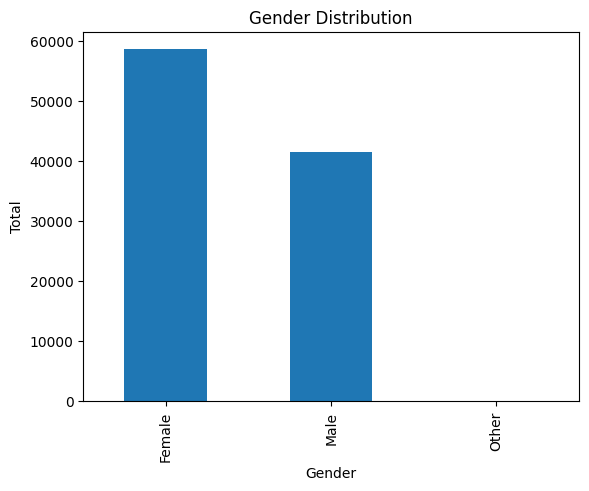

In [10]:
gender = diabetes['gender'].value_counts()

gender.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total')

plt.show()

 The distribution reveals the **other** category has a value that approximates to 0, in contrast to the **female** category, which approximates 58,000 instances, and the **male** category, which registers around 40,000. As the **other** label holds no utility for the intended modelling process, its deletion will be necessary.

Illustrate the distribution of **smoking_history** column through a bar chart visualization.

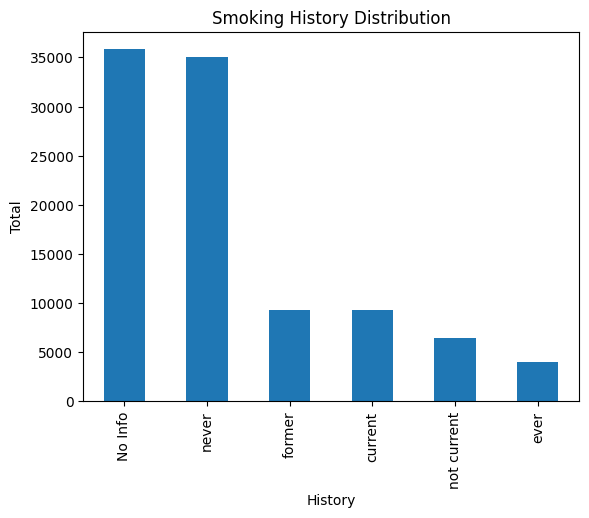

In [11]:
smoking_history = diabetes['smoking_history'].value_counts()

smoking_history.plot(kind='bar')
plt.title('Smoking History Distribution')
plt.xlabel('History')
plt.ylabel('Total')
plt.show()

The resulting depiction highlights **No Info** as the most prevalent category, while others are markedly less frequent. Given that **No Info** label likely denote missing or unavailable data, its unaddressed presence has the potential to introduce bias into the model. Following the removal for duplicate rows become 96,146, the dataset comprises ~60,000 entries, underscoring the need to assess the impact of retaining the **No Info** category on subsequent modeling.

A pie chart visualization serves to illustrate the proportional representation within the **hypertension** column.

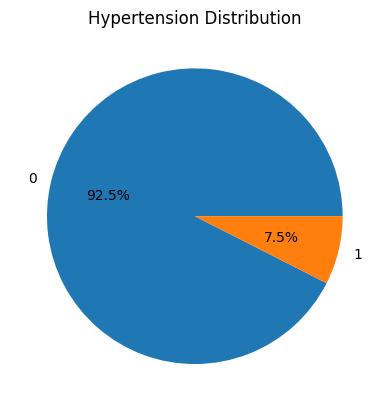

In [12]:
hypertension = diabetes['hypertension'].value_counts()

hypertension.plot(kind='pie', autopct='%1.1f%%')
plt.title('Hypertension Distribution')
plt.ylabel('')
plt.show()

The numerical encoding designates 0 as the absence of hypertension; In contrast, numerical encoding designates 1 as the indication of hypertension. These charts show that the majority are people who don't have hypertension. Considering that the 0 value accounts for 92.5% of the overall dataset composition, the implementation of undersampling is deemed inadvisable, as it would precipitate a substantial reduction in the total number of observations, potentially compromising the integrity of other columns.

A pie chart visualization serves to illustrate the proportional representation within the **heart_disease** column.

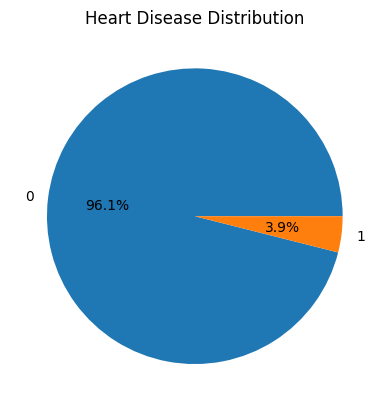

In [13]:
heart_disease = diabetes['heart_disease'].value_counts()

heart_disease.plot(kind='pie', autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()

The numerical encoding designates 0 as the absence of heart disease; In contrast, numerical encoding designates 1 as the indication of heart disease. Regarding the distributional characteristics of **hypertension**, the application of undersampling is deemed imprudent due to the overwhelming prevalence of 0 values, comprising 96.1% of the overall dataset.

## **DATA PREPROCESSING**

Eliminate entries with irrelevant or unclear values, such as the "Other" category in the **gender** column and "No Info" in the **smoking_history** column, which may introduce noise or bias into the model training process.

In [14]:
diabetes = diabetes.drop_duplicates()

In [ ]:
gender_label = diabetes[diabetes['gender'] == 'Other'].index
diabetes.drop(gender_label, inplace=True)

In [ ]:
smoking_history_label = diabetes[diabetes['smoking_history'] == 'No Info'].index
diabetes.drop(smoking_history_label, inplace=True)

Apply label encoding to convert categorical variables —specifically the **gender** and **smoking_history** columns— into numeric value using ```LabelEncoder```.

In [ ]:
labelEncoder = LabelEncoder()
diabetes['gender'] = labelEncoder.fit_transform(diabetes['gender'])
diabetes['smoking_history'] = labelEncoder.fit_transform(diabetes['smoking_history'])

Apply the Interquartile Range (IQR) method to the numerical features such as **age**, **bmi**, **HbA1c_level**, and **blood_glucose_level** with calculates the lower and upper bounds based on the ```1.5 * IQR``` rule and caps values outside this range to the nearest acceptable limit.

In [ ]:
def cap_outliers(diabetes, column):
    Q1 = diabetes[column].quantile(0.25)
    Q3 = diabetes[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diabetes[column] = diabetes[column].clip(lower_bound, upper_bound)
    return diabetes

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    diabetes = cap_outliers(diabetes, col)

Split the dataset into training and testing subsets using an 80:20 ratio with ```train_test_split```. The **features** (X) are separated from the **target variable** (y), and stratification is applied based on the target to maintain the original class distribution in both subsets.

In [19]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 63247
Total sample in train dataset: 50597
Total sample in test dataset: 12650


Apply feature standardization using ```StandardScaler```. Importantly, the scaler is fitted only on the training data (X_train) to avoid data leakage, and then applied to both the training and test sets. This approach improves model performance and ensures fair evaluation by maintaining the integrity of unseen test data.

In [21]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

Examine the **boxplot** of each feature and ensure outliers have been properly handled

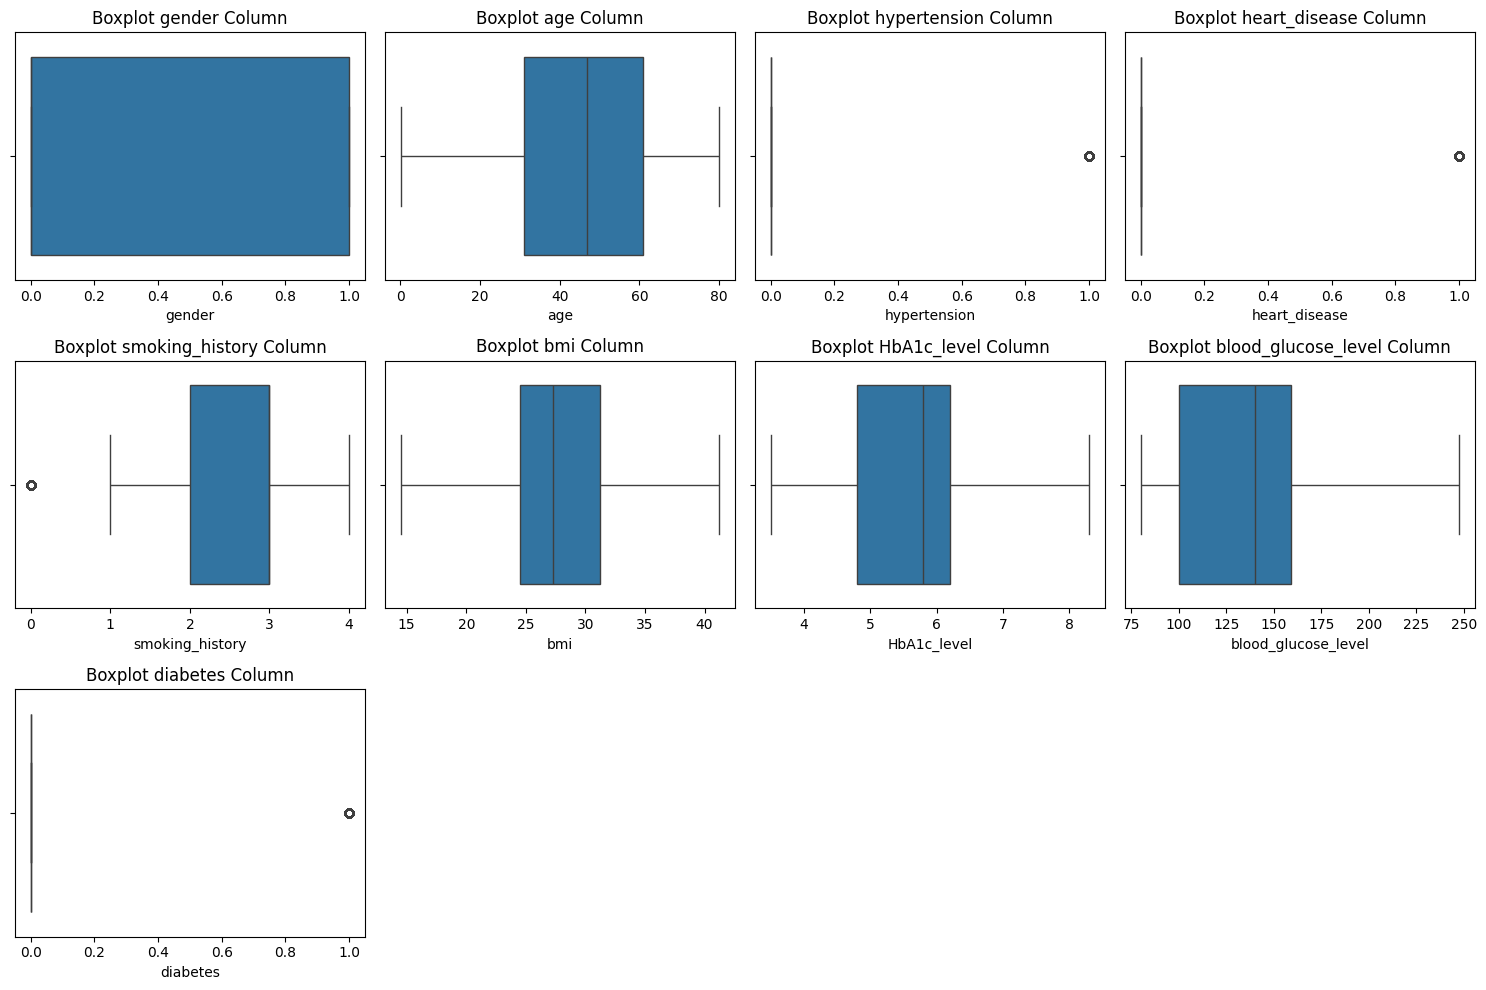

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetes.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=diabetes[col])
    plt.title(f'Boxplot {col} Column')

plt.tight_layout()
plt.show()

The boxplots reveal that most numerical features such as age, BMI, HbA1c level, and blood glucose level contain some outliers, particularly on the higher end, indicating possible extreme values that may need further investigation or treatment. Categorical or binary features like gender, hypertension, heart disease, and diabetes appear well-distributed without apparent outliers, which is expected given their limited value range. Notably, the smoking_history feature, although numeric, shows variability that suggests it may represent encoded categorical data, with a few outliers at the lower end. Overall, while categorical features are clean, numerical features might benefit from outlier handling to improve model performance.

Explore relationships between each feature using **pairplot**

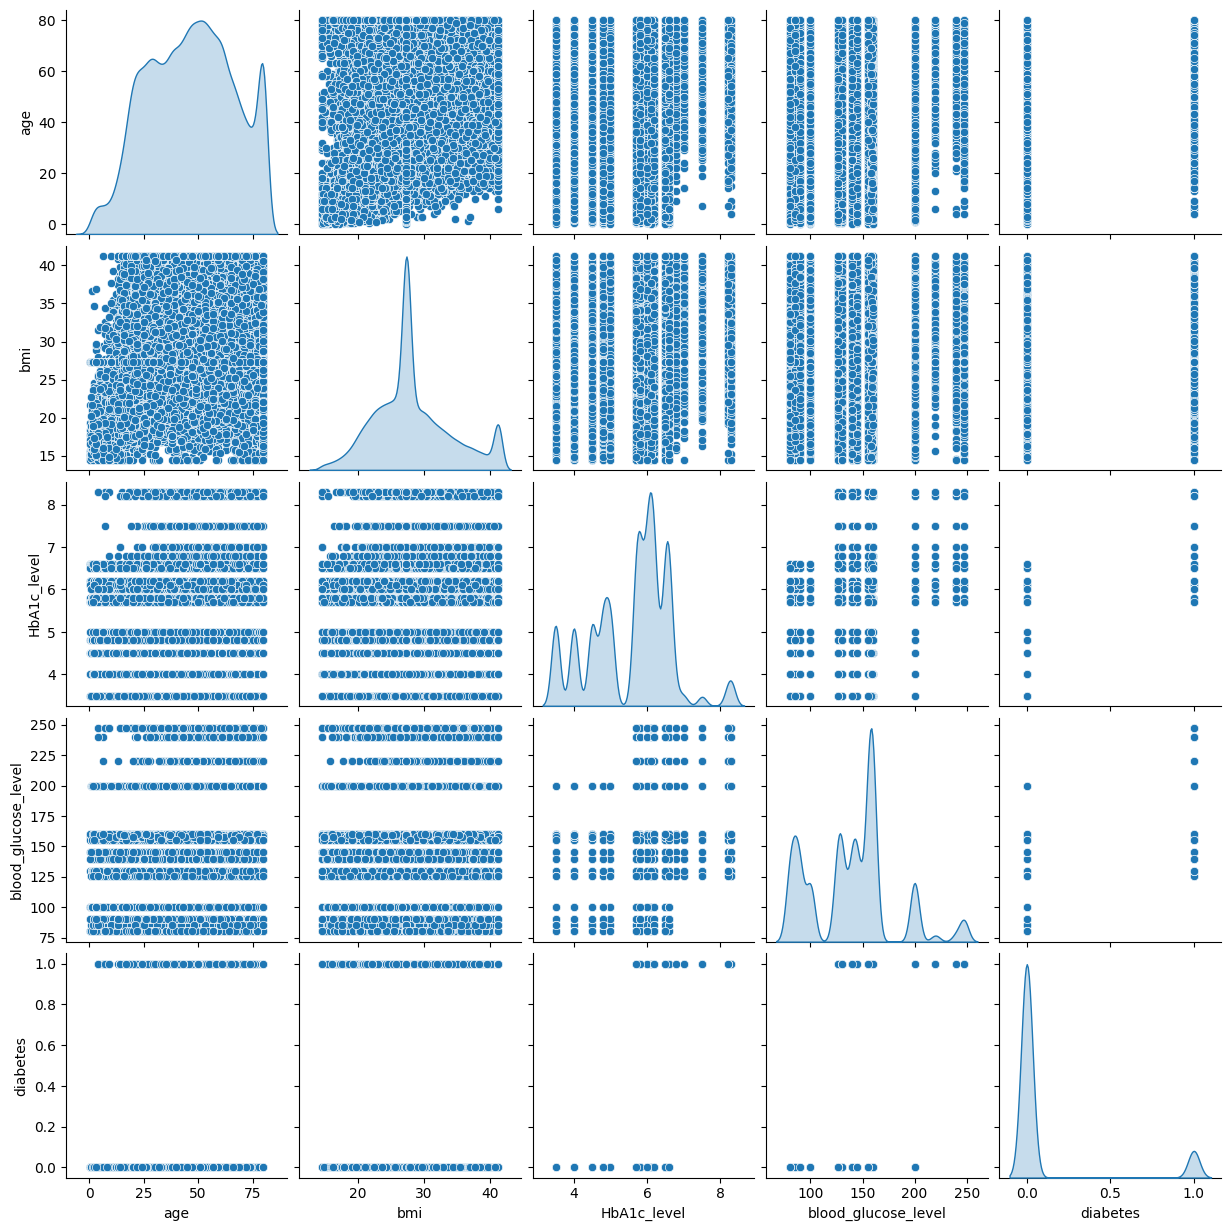

In [25]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
sns.pairplot(diabetes[features], diag_kind='kde')

The pairplot reveals a few notable patterns in the data. Individuals diagnosed with diabetes (diabetes = 1) tend to have higher HbA1c and blood glucose levels, which aligns with medical expectations, indicating these features are strong indicators of diabetes. There is no clear linear relationship between age or BMI with diabetes, although slight clustering suggests that older individuals and those with higher BMI may have a higher risk. The distribution of HbA1c and blood glucose levels is more skewed for diabetic individuals, while non-diabetic cases are more concentrated at lower values. Overall, HbA1c and blood glucose levels show the strongest visual separation between diabetic and non-diabetic groups.

Analyze the correlation between features using **heatmap**

Text(0.5, 1.0, 'Correlation Matrix')

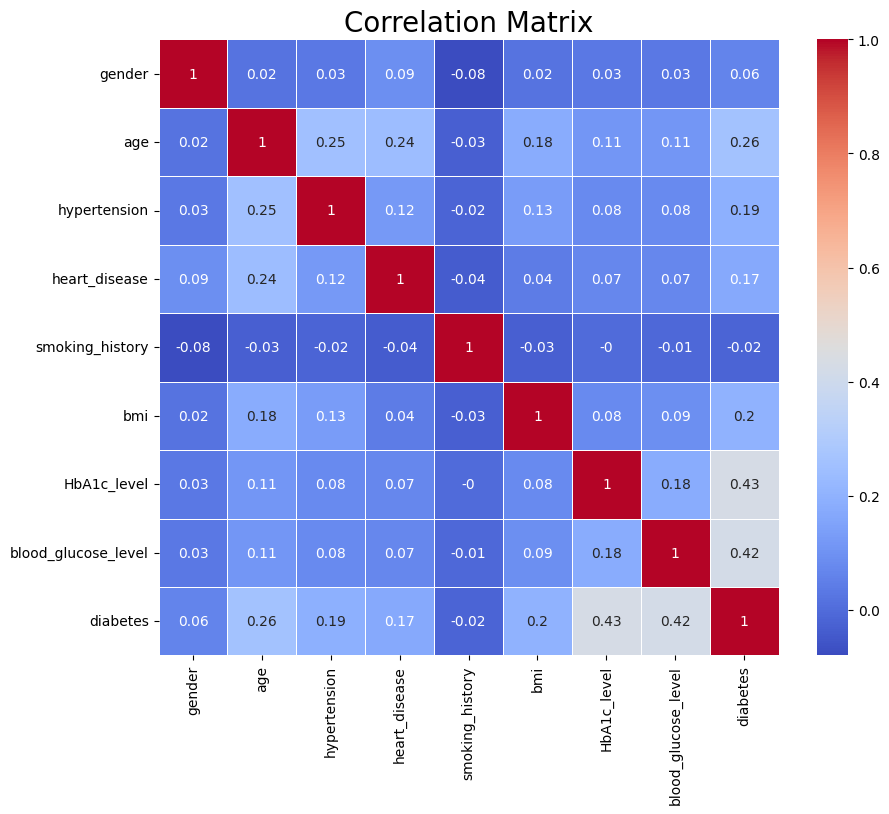

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5, )
plt.title('Correlation Matrix', size=20)

The correlation heatmap shows that HbA1c_level and blood_glucose_level have the strongest positive correlation with the target variable diabetes, with coefficients around 0.45 and 0.39 respectively. This aligns with known clinical indicators of diabetes. Other features such as age, bmi, and hypertension exhibit weak to very weak positive correlations with diabetes (less than 0.1), suggesting they might contribute less directly. Additionally, most features do not show strong correlations with each other, indicating minimal multicollinearity. Overall, the heatmap highlights HbA1c_level and blood_glucose_level as the most informative predictors for diabetes in this dataset.

## **MODEL TRAINING**

Several algorithms were employed in the development of a diabetes prediction model, such as **Linear Support Vector Classifier (LinearSVC)**, **Logistic Regression**, **Random Forest Classifier**, **AdaBoost Classifier**. To optimize model performance, a predefined parameter grid was leveraged for hyperparameter tuning across all models, facilitating the discovery of ideal hyperparameter sets. Through the GridSearchCV and RandomizedSearchCV during the training process, the hyperparameter space was efficiently explored and optimal configurations identified.

In [27]:
model_dict = {
    'LinearSVC': LinearSVC(random_state=55, dual=False),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=55, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

param_grid = {
    'LinearSVC': {
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [1000, 2000]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 16, 20],
        'min_samples_split': [2, 5]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1]
    }
}

best_models = {}
accuracy = pd.DataFrame(columns=['train', 'test'], index=model_dict.keys())

for name, model in model_dict.items():
    print(f"Tuning {name}")
    grid = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    accuracy.loc[name, 'train'] = accuracy_score(y_train, best_model.predict(X_train))
    accuracy.loc[name, 'test'] = accuracy_score(y_test, best_model.predict(X_test))

    print(f"Best params for {name}: {grid.best_params_}")

Tuning LinearSVC
Best params for LinearSVC: {'C': 1, 'max_iter': 1000}
Tuning LogisticRegression
Best params for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Tuning RandomForest
Best params for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Tuning AdaBoost
Best params for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}


The hyperparameter outcomes emphasize the necessity for distinct optimization strategies across models. These result shows that each model's performance is influenced by specific hyperparameter settings, and choosing the appropriate values is crucial for maximizing accuracy and stability.

In [28]:
accuracy

,train,test
LinearSVC,0.948119,0.947273
LogisticRegression,0.947586,0.947115
RandomForest,0.963832,0.963083
AdaBoost,0.962725,0.963004


The obtained model performance results demonstrate that all four models achieve elevated accuracy on both the training and testing datasets. Notably, **LinearSVC** and **LogisticRegression** show slightly diminished accuracy (94%) relative to **RandomForest** and **AdaBoosting** (96%). Consequently, these outcomes suggest a slightly more robust and reliable outcome for this particular prediction task.

## **EVALUATION**

After training, the model is evaluated on the test dataset to assess its performance in predicting diabetes class from unfamiliar data. The evaluation metrics that will be used are:

**Classification Report**: Summarizes key per-class performance metrics such as precision, recall, F1-score, and support. These metrics collectively provide a comprehensive evaluation of the model’s effectiveness in correctly classifying each class, with higher accuracy indicating better differentiation of the diabetes class.

In [29]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Classification Report for LinearSVC:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11243
           1       0.87      0.62      0.72      1407

    accuracy                           0.95     12650
   macro avg       0.91      0.80      0.85     12650
weighted avg       0.94      0.95      0.94     12650



Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11243
           1       0.85      0.63      0.73      1407

    accuracy                           0.95     12650
   macro avg       0.90      0.81      0.85     12650
weighted avg       0.94      0.95      0.94     12650



Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11243
           1       1.00      0.67      0.80      1407

    accuracy                           0.96     1265

Despite achieving high accuracy (95-96%), indicating that they are able to correctly classify the majority of the data overall. However, differences in performance are more apparent in the recall and F1-score metrics, especially for the minority class.

**Confusion Matrix**: Provides a detailed breakdown of the model's classification performance by displaying the counts of true positives, true negatives, false positives, and false negatives. This metric facilitates a deeper understanding of the model's classification acumen by quantifying both true and false predictions for each class.

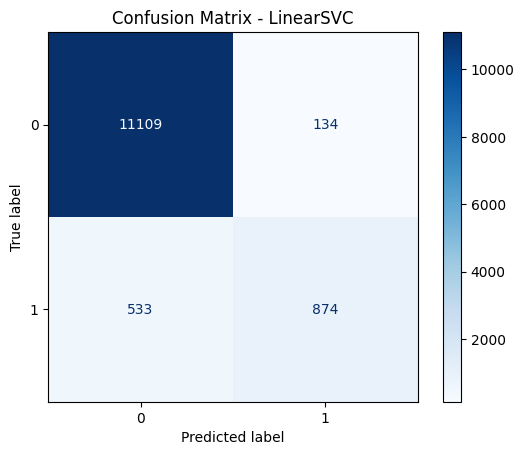

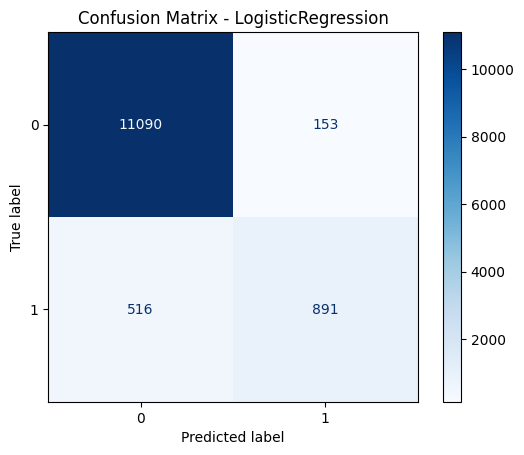

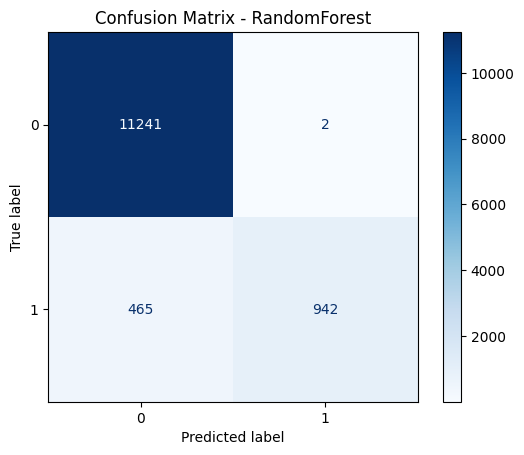

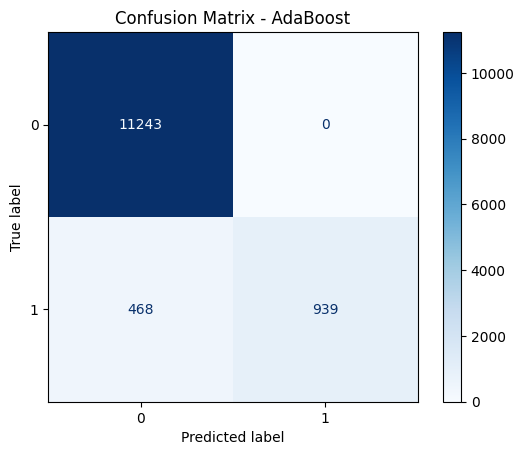

In [30]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

The comparative analysis reveals the performance of **AdaBoost** for all aspects is assessed, notably eliminating false positives and achieving a higher degree of accuracy. However, **RandomForest** has a higher recall than **AdaBoost**. Both **LinearSVC** and **LogisticRegression** demonstrate a weakness in predicting positive cases, resulting in lower recall values.

**ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: Serves as a metric for evaluating a model's discriminatory capacity between positive and negative classes. The highest AUC score enhanced model performance in differentiating the diabetes class.

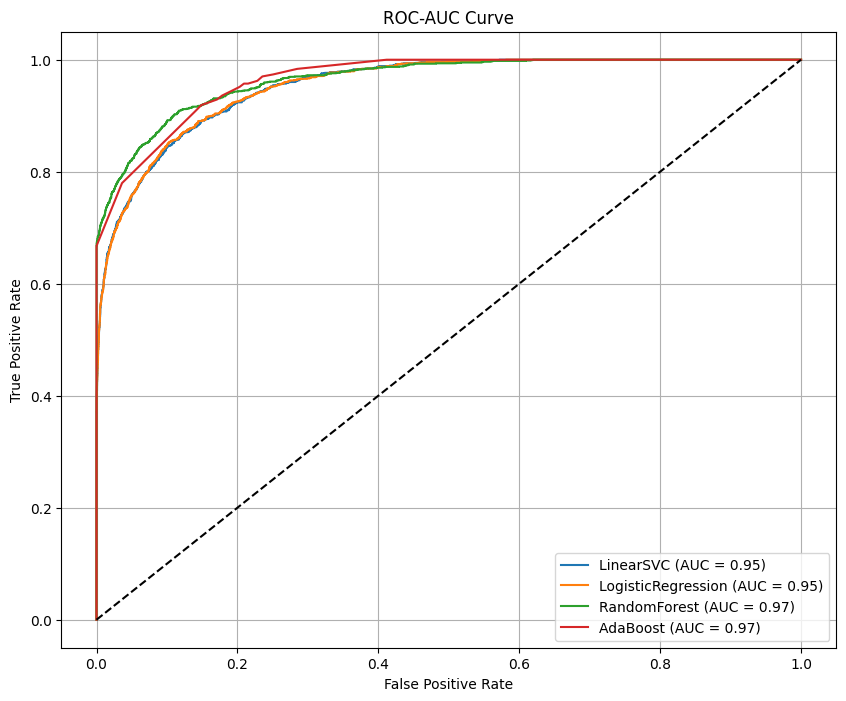

In [31]:
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f'{name} Model Not Support ROC-AUC')
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    except Exception as e:
        print(f"Failed to Calculate ROC-AUC For {name} Model: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Based on the observed results, both **RandomForest** and **AdaBoost** emerged as effective diabetes detection within this dataset. Conversely, **LinearSVC** and **LogisticRegression**, while offering the advantage of simplicity and speed, may still be considered as alternative approaches.

## **RESULT**

Each model will predict a maximum of 12,650 samples from the test dataset, and the prediction result will be benchmarked against the reference labels (y_true). These results can be used for further evaluation or system integration validation.

In [32]:
pred = X_test.copy()
pred_dict = {'y_true': y_test[:20000].values}

for name, model in best_models.items():
    pred_dict['pred_' + name] = model.predict(pred).round(1)

predictions_diabetes = pd.DataFrame(pred_dict)
predictions_diabetes

,y_true,pred_LinearSVC,pred_LogisticRegression,pred_RandomForest,pred_AdaBoost
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
12645,0,0,0,0,0
12646,0,0,0,0,0
12647,0,0,0,0,0
12648,0,0,0,0,0
